# Drug Classification

Menemukan jenis narkoba yang digunakan oleh pasien menggunakan machine learning. Mari ikuti langkahnya satu-persatu melalui cell code berikut.

In [2]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat Data Menjadi Dataframe
dataku = pd.read_csv('drug200.csv')

# Menampilkan 5 Baris Pertama Dari Dataframe
dataku.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
dataku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
# Melakukan Import LabelEncoder dari Modul Sklearn
from sklearn.preprocessing import LabelEncoder

# Menyalin Dataframe Awal Supaya Tetap Utuh
dataku_int = dataku.copy()

# Membuat Object atau Instance dengan Nama Encoder
encoder = LabelEncoder()

# Membuat List Dari Nama kolom Data Kategori
categorical_data = ['Sex', 'BP', 'Cholesterol', 'Drug']

# Mengubah Setiap Kolom Kategori Menjadi Numerik
for kolom in categorical_data:
  dataku_int[kolom] = encoder.fit_transform(dataku[kolom])

# Berhasil!
dataku_int.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [6]:
import joblib

joblib.dump(encoder, 'encoder.pkl')

['encoder.pkl']

In [4]:
for kolom in categorical_data:
  print(kolom, dataku_int[kolom].unique())

Sex [0 1]
BP [0 1 2]
Cholesterol [0 1]
Drug [0 3 4 1 2]


In [5]:
for kolom in categorical_data:
  print(kolom, dataku[kolom].unique())

Sex ['F' 'M']
BP ['HIGH' 'LOW' 'NORMAL']
Cholesterol ['HIGH' 'NORMAL']
Drug ['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [6]:
# Menampilkan Matrix Kolerasi Antar Kolom
dataku_int.corr()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.000000,0.102027,0.054212,-0.068234,-0.063119,0.041856
Sex,0.102027,1.000000,-0.007814,-0.008811,-0.125008,0.018239
BP,0.054212,-0.007814,1.000000,-0.137552,-0.149312,0.419397
Cholesterol,-0.068234,-0.008811,-0.137552,1.000000,0.010000,0.048415
Na_to_K,-0.063119,-0.125008,-0.149312,0.010000,1.000000,-0.689051
Drug,0.041856,0.018239,0.419397,0.048415,-0.689051,1.000000


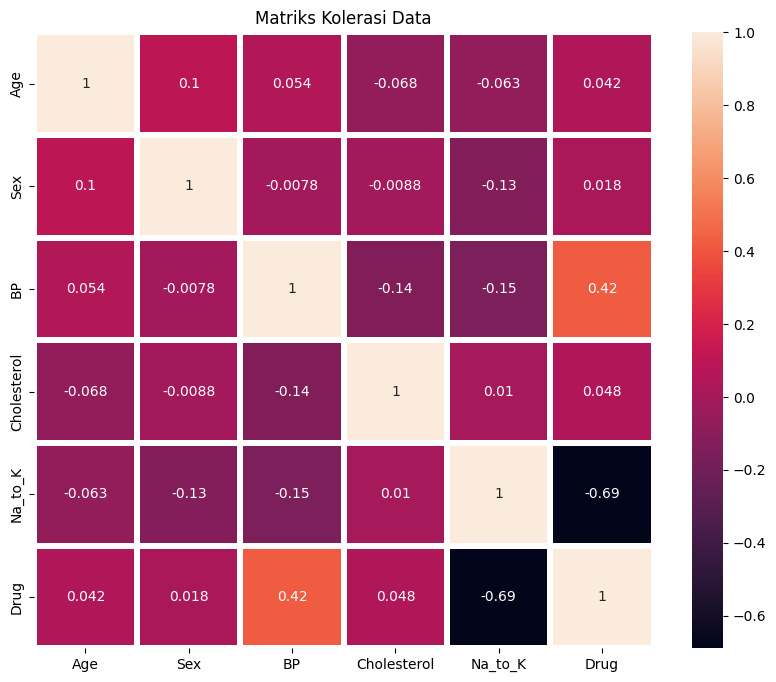

In [7]:
plt.figure(figsize=(10,8))
plt.title('Matriks Kolerasi Data')
sns.heatmap(dataku_int.corr(), annot=True, linewidths=3)
plt.show()

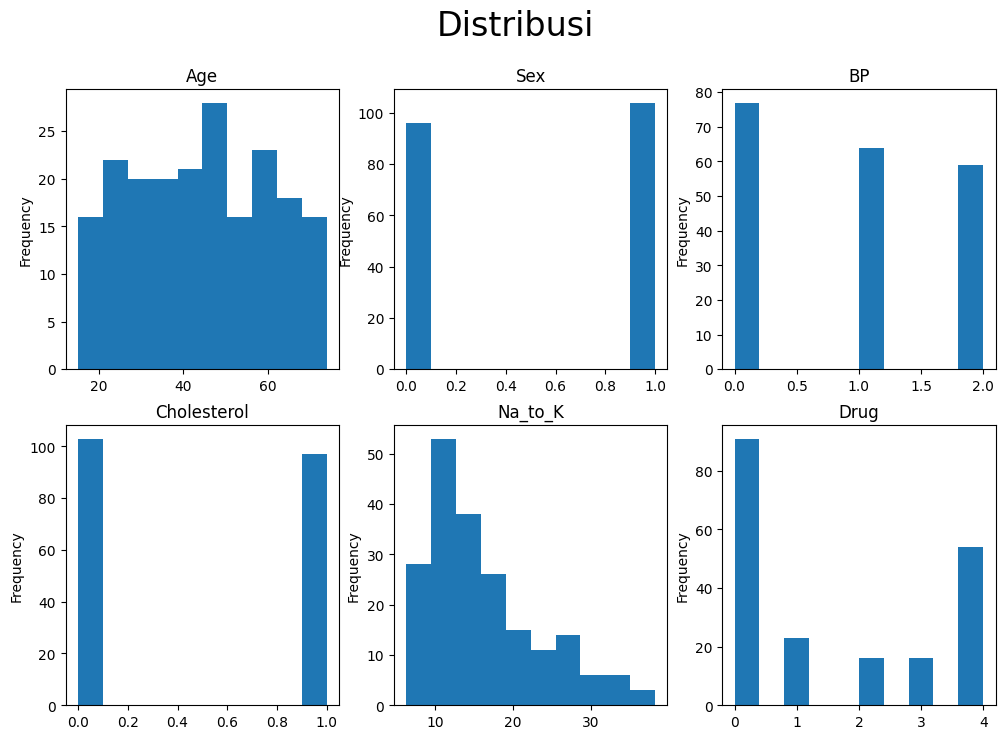

In [8]:
# Distribusi Data

def distribusi():
  fig,axes= plt.subplots(nrows=2, ncols=3, figsize=(12,8))
  plt.suptitle('Distribusi', fontsize=24)

  def kolom_generator():
    for kolom in dataku_int:
      yield kolom
  kolom = kolom_generator()

  for i in range(0, 2):
    for j in range(0, 3):
      k = next(kolom)
      dataku_int[k].plot(kind='hist', ax = axes[i, j])
      axes[i, j].set_title(k)

plt.show()
distribusi()

In [9]:
# Memisahkan Data

data = dataku_int.drop('Drug', axis=1)
label = dataku_int['Drug']

# Memisahkan Data untuk Latihan dan Tes
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2)

# Print untuk Mengetahui Bentuk Dataframe
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(160, 5) (160,)
(40, 5) (40,)


In [10]:
# Mari Kita Gunakan linear SVC
# Import Linear SVC Model Dari Sklearn
from sklearn.svm import SVC

# Buat Objek dengan Nama Model dengan Memanggil SVC()
model = SVC(gamma='scale')

In [11]:
# Melatih model dengan data pelatihan (x_train dan y_train)
model.fit(x_train, y_train)

SVC()

In [12]:
# Membuat prediksi dengan data uji (x_test)
prediction = model.predict(x_test)

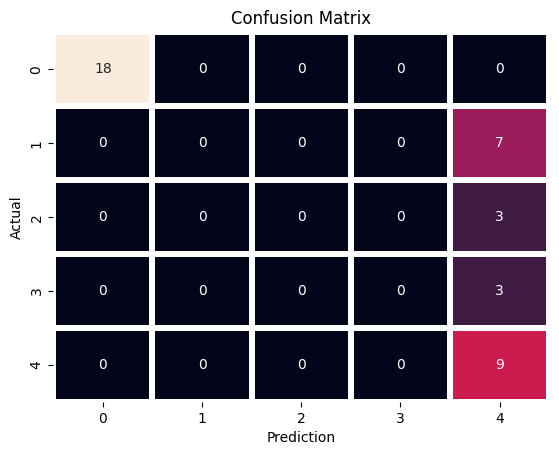

In [13]:
# Import confusion matrix dari sklearn
from sklearn.metrics import confusion_matrix

# Membuat funsi untuk menampilkan confusion matrix dengan seaborn dan matplotlib
def display_conf(y_test,prediction):
    sns.heatmap(confusion_matrix(y_test,prediction),annot=True,linewidths=3,cbar=False)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Prediction')
    plt.show()

# Memanggil fungsi untuk menampilkan visualisasi confusion matrix
display_conf(y_test,prediction)

In [14]:
from sklearn.metrics import r2_score, classification_report

print(f'R2 Score : {r2_score(y_test,prediction)}')
print('Classification Report :')
print(classification_report(y_test, prediction, zero_division=0))

R2 Score : 0.26345609065155806
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         3
           4       0.41      1.00      0.58         9

    accuracy                           0.68        40
   macro avg       0.28      0.40      0.32        40
weighted avg       0.54      0.68      0.58        40



In [15]:
# Meningkatkan Model
# Menggunakan GridSearchCV untuk menemukan model dengan parameter terbaik

from sklearn.model_selection import GridSearchCV

# SVC Model Hyperparameter
param_grid = {'C':[0.01,0.1,1,10,100],
              'gamma':[100,10,1,0,1,0.01]}

# Membuat model terbaik dari semua kemungkinan kombinasi param_grid
best_model = GridSearchCV(SVC(),param_grid,cv=5,refit=True)

# Melatih model terbaik
best_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [100, 10, 1, 0, 1, 0.01]})

In [16]:
# Model dengan parameter terbaik
best_model.best_estimator_

SVC(C=100, gamma=0.01)

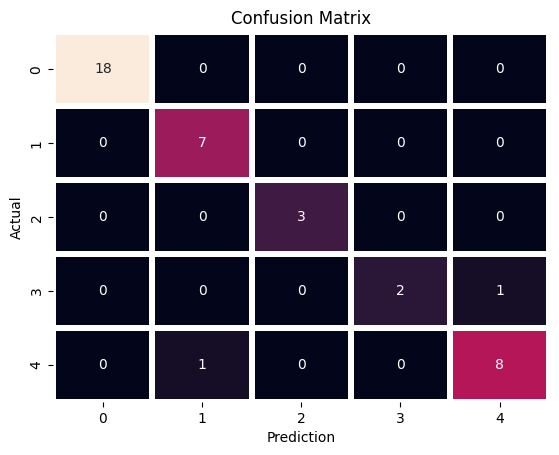

In [17]:
# Membuat prediksi dengan model yang telah ditingkatkan
prediction = best_model.predict(x_test)
# Menampilkan confusion matrix pada prediksi yang baru
display_conf(y_test,prediction)

In [18]:
print(f'R2 Score : {r2_score(y_test,prediction)}')
print('Classification Report :')
print(classification_report(y_test,prediction))

R2 Score : 0.9055712936732767
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.88      1.00      0.93         7
           2       1.00      1.00      1.00         3
           3       1.00      0.67      0.80         3
           4       0.89      0.89      0.89         9

    accuracy                           0.95        40
   macro avg       0.95      0.91      0.92        40
weighted avg       0.95      0.95      0.95        40



In [19]:
import pickle
# Menyimpan model menjadi file .pkl
with open('ML_DrugClassifier.pkl','wb') as file:
    pickle.dump(best_model,file)

In [20]:
# Memuat model dalam file .pkl
with open('ML_DrugClassifier.pkl','rb') as file:
    model = pickle.load(file)

In [21]:
# Model dengan parameter terbaik
best_model.best_estimator_

SVC(C=100, gamma=0.01)

In [22]:
# Yuk, lakukan prediksi

def self_prediction():
    try:
        # Input dari pengguna
        age = int(input('Age : '))
        sex = int(input('Sex (0 for Female, 1 for Male): '))
        bp = int(input('BP (0: Low, 1: Normal, 2: High): '))
        chol = int(input('Cholesterol (0: Normal, 1: High): '))
        NatoK = float(input('Na_to_K : '))

        # Data harus berbentuk array 2D
        data = [[age, sex, bp, chol, NatoK]]

        # Prediksi dan hasil
        print('\nPrediction')
        pred_label = model.predict(data)[0]
        pred_drug = encoder.inverse_transform([pred_label])[0]
        print('Patient consumed:', pred_drug)

    except Exception as e:
        print('Error:', e)

# Memanggil fungsi
self_prediction()

Age : 20
Sex (0 for Female, 1 for Male): 0
BP (0: Low, 1: Normal, 2: High): 1
Cholesterol (0: Normal, 1: High): 1
Na_to_K : 10

Prediction
Patient consumed: drugX


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
joblib.dump(encoder, 'encoder.pkl')